You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

 

Note: Download 311-service-requests-nyc.zip file using the link given in the Customer Service Requests Analysis project problem statement and extract the 311_Service_Requests_from_2010_to_Present.csv file

 

Perform the following steps:

Understand the dataset:
Identify the shape of the dataset
Identify variables with null values
2. Perform basic data exploratory analysis:

Utilize missing value treatment
Analyze the date column and remove the entries if it has an incorrect timeline
Draw a frequency plot for city-wise complaints
Draw scatter and hexbin plots for complaint concentration across Brooklyn
3. Find major types of complaints:

Plot a bar graph of count vs. complaint types
Find the top 10 types of complaints
Display the types of complaints in each city in a separate dataset
 

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [1]:
import pandas as pd
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [2]:
dataset.head()

,007,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,24450803,11/22/2012 12:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,10457.0,2108 RYER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.853434,-73.900648,"(40.853433733293734, -73.90064798704458)"
1,24453150,11/22/2012 12:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,10457.0,2108 RYER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.853434,-73.900648,"(40.853433733293734, -73.90064798704458)"
2,24451627,11/22/2012 12:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,10457.0,2108 RYER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.853434,-73.900648,"(40.853433733293734, -73.90064798704458)"
3,24455725,11/22/2012 12:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11377.0,39-25 51 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.747681,-73.913026,"(40.747681137939004, -73.91302589411522)"
4,24451863,11/22/2012 12:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10457.0,2108 RYER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.853434,-73.900648,"(40.853433733293734, -73.90064798704458)"


Looking at the first 5 rows information we can see, there are several NAN values in the bridge highway name/Direction/segment, road map, garage lot name, ferry direction/terminal name

In [3]:
dataset.shape

(10892, 52)

In [4]:
dataset.isnull

<bound method DataFrame.isnull of             007         Created Date          Closed Date Agency  \
0      24450803  11/22/2012 12:00 AM                  NaN    HPD   
1      24453150  11/22/2012 12:00 AM                  NaN    HPD   
2      24451627  11/22/2012 12:00 AM                  NaN    HPD   
3      24455725  11/22/2012 12:00 AM                  NaN    HPD   
4      24451863  11/22/2012 12:00 AM                  NaN    HPD   
...         ...                  ...                  ...    ...   
10887  15652446  01/04/2010 12:00 AM  01/09/2010 12:00 AM    HPD   
10888  15652445  01/04/2010 12:00 AM  01/07/2010 12:00 AM    HPD   
10889  15642445  01/03/2010 12:00 AM  01/08/2010 12:00 AM    HPD   
10890  15642447  01/03/2010 12:00 AM  01/07/2010 12:00 AM    HPD   
10891  15642446  01/03/2010 12:00 AM  01/05/2010 12:00 AM    HPD   

                                             Agency Name Complaint Type  \
0      Department of Housing Preservation and Develop...       PLUMBING   

In [5]:
dataset.isnull().sum(axis=0)

007                                   0
Created Date                          0
Closed Date                        4383
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                           31
Location Type                      3403
Incident Zip                        769
Incident Address                   2211
Street Name                        2211
Cross Street 1                     2130
Cross Street 2                     2170
Intersection Street 1              8897
Intersection Street 2              8897
Address Type                        292
City                                765
Landmark                          10883
Facility Type                      9753
Status                                0
Due Date                           8711
Resolution Action Updated Date     1461
Community Board                       0
Borough                               0
X Coordinate (State Plane)          797


In [6]:
data_null = dataset.isna()

For checking all NA values we created a new dataset data_null, let's print it and see what information it contains

In [7]:
data_null

,007,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,False,False,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10887,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
10888,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
10889,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
10890,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


Looking at the results we can confirm that isna becomes true only for brindge highway/Direaction/Segment, road map, Garage lot name ferry direction/terminal name. so it would require null value treatment

In [8]:
no_of_na_in_dataset = dataset.isna().sum(axis=0)

In [9]:
no_of_na_in_dataset 

007                                   0
Created Date                          0
Closed Date                        4383
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                           31
Location Type                      3403
Incident Zip                        769
Incident Address                   2211
Street Name                        2211
Cross Street 1                     2130
Cross Street 2                     2170
Intersection Street 1              8897
Intersection Street 2              8897
Address Type                        292
City                                765
Landmark                          10883
Facility Type                      9753
Status                                0
Due Date                           8711
Resolution Action Updated Date     1461
Community Board                       0
Borough                               0
X Coordinate (State Plane)          797


now we see where NA exist, but for dropping all NA items we need to know no of NA in each column i.e axis=0 
We can see thate there are many columns for which we have NA given and these are categorical details which will not impact the Dependent data "Complaint type" , so we can drop these to declutter the dataset

In [10]:
dataset.drop('Intersection Street 1', axis=1, inplace=True)
dataset.drop('Intersection Street 2', axis=1, inplace = True)
dataset.drop('Landmark',axis=1, inplace=True)
dataset.drop('School or Citywide Complaint', axis=1, inplace=True)
dataset.drop('Vehicle Type' , axis=1, inplace= True)
dataset.drop('Taxi Company Borough' , axis=1, inplace = True)
dataset.drop('Taxi Pick Up Location', axis=1, inplace=True)
dataset.drop('Bridge Highway Name', axis=1, inplace=True)
dataset.drop('Bridge Highway Direction', axis=1, inplace = True)
dataset.drop('Road Ramp', axis = 1, inplace= True)
dataset.drop('Bridge Highway Segment', axis=1, inplace=True)
dataset.drop('Garage Lot Name', axis=1, inplace= True)
dataset.drop('Ferry Direction', axis=1, inplace=True)
dataset.drop('Ferry Terminal Name', axis=1, inplace=True)

In [11]:
dataset.columns

Index(['007', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

Let us analyze if the date columns have correct data, for example if closed date is smaller than created date, then closed date is incorrect. 

In [12]:
dataset['Created Date']

0        11/22/2012 12:00 AM
1        11/22/2012 12:00 AM
2        11/22/2012 12:00 AM
3        11/22/2012 12:00 AM
4        11/22/2012 12:00 AM
                ...         
10887    01/04/2010 12:00 AM
10888    01/04/2010 12:00 AM
10889    01/03/2010 12:00 AM
10890    01/03/2010 12:00 AM
10891    01/03/2010 12:00 AM
Name: Created Date, Length: 10892, dtype: object

In [13]:
dataset['Closed Date']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                ...         
10887    01/09/2010 12:00 AM
10888    01/07/2010 12:00 AM
10889    01/08/2010 12:00 AM
10890    01/07/2010 12:00 AM
10891    01/05/2010 12:00 AM
Name: Closed Date, Length: 10892, dtype: object

In [14]:
import numpy as np
if(dataset['Closed Date'].any() < dataset['Created Date'].any()):
    print("Some of the closed dates are before created date - incorrect date assignment- we should drop them")
else:
    print("All closed dates are after created date")

All closed dates are after created date


In [15]:
dataset['Closed Date'].dropna()

12       11/22/2012 12:00 AM
17       11/22/2012 12:00 AM
19       11/22/2012 12:00 AM
20       11/22/2012 12:00 AM
21       11/22/2012 12:00 AM
                ...         
10887    01/09/2010 12:00 AM
10888    01/07/2010 12:00 AM
10889    01/08/2010 12:00 AM
10890    01/07/2010 12:00 AM
10891    01/05/2010 12:00 AM
Name: Closed Date, Length: 6509, dtype: object

In [16]:
import matplotlib.pyplot as plt
city_list = dataset['City']
city_list

0           BRONX
1           BRONX
2           BRONX
3        Woodside
4           BRONX
           ...   
10887    NEW YORK
10888     JAMAICA
10889    BROOKLYN
10890    BROOKLYN
10891    NEW YORK
Name: City, Length: 10892, dtype: object

In [17]:
city_list.unique()

array(['BRONX', 'Woodside', 'Sunnyside', 'BROOKLYN', 'NEW YORK',
       'STATEN ISLAND', 'BAYSIDE', 'FLUSHING', 'COLLEGE POINT', nan,
       'QUEENS VILLAGE', 'EAST ELMHURST', 'LONG ISLAND CITY', 'ASTORIA',
       'SOUTH RICHMOND HILL', 'Jamaica', 'Forest Hills', 'East Elmhurst',
       'Maspeth', 'Rego Park', 'Springfield Gardens', 'Flushing',
       'Jackson Heights', 'Saint Albans', 'Elmhurst', 'Howard Beach',
       'South Richmond Hill', 'Corona', 'Ridgewood', 'Astoria',
       'Woodhaven', 'Richmond Hill', 'Far Rockaway', 'Long Island City',
       'Queens Village', 'Arverne', 'Rockaway Park', 'Ozone Park',
       'Hollis', 'Kew Gardens', 'College Point', 'Bayside',
       'Fresh Meadows', 'Whitestone', 'Rosedale', 'Middle Village',
       'South Ozone Park', 'Oakland Gardens', 'Cambria Heights',
       'LITTLE NECK', 'OAKLAND GARDENS', 'ELMHURST', 'CORONA',
       'Little Neck', 'Bellerose', 'FAR ROCKAWAY', 'REGO PARK',
       'WOODSIDE', 'JACKSON HEIGHTS', 'FOREST HILLS', 'SOUT

In [18]:
city_list.unique().shape

(90,)

the data given has 90 city. all the complaints registered is in these 90 cities

Let us analyze which city has reported highest numbers of incidents, and what is the category of all the incidents reported
To analyze how many incidents reported in a city we can simply count the number of rows which has that particular city name in column "City". we can do this by count() method or for visualization we can use countplot from seaborn

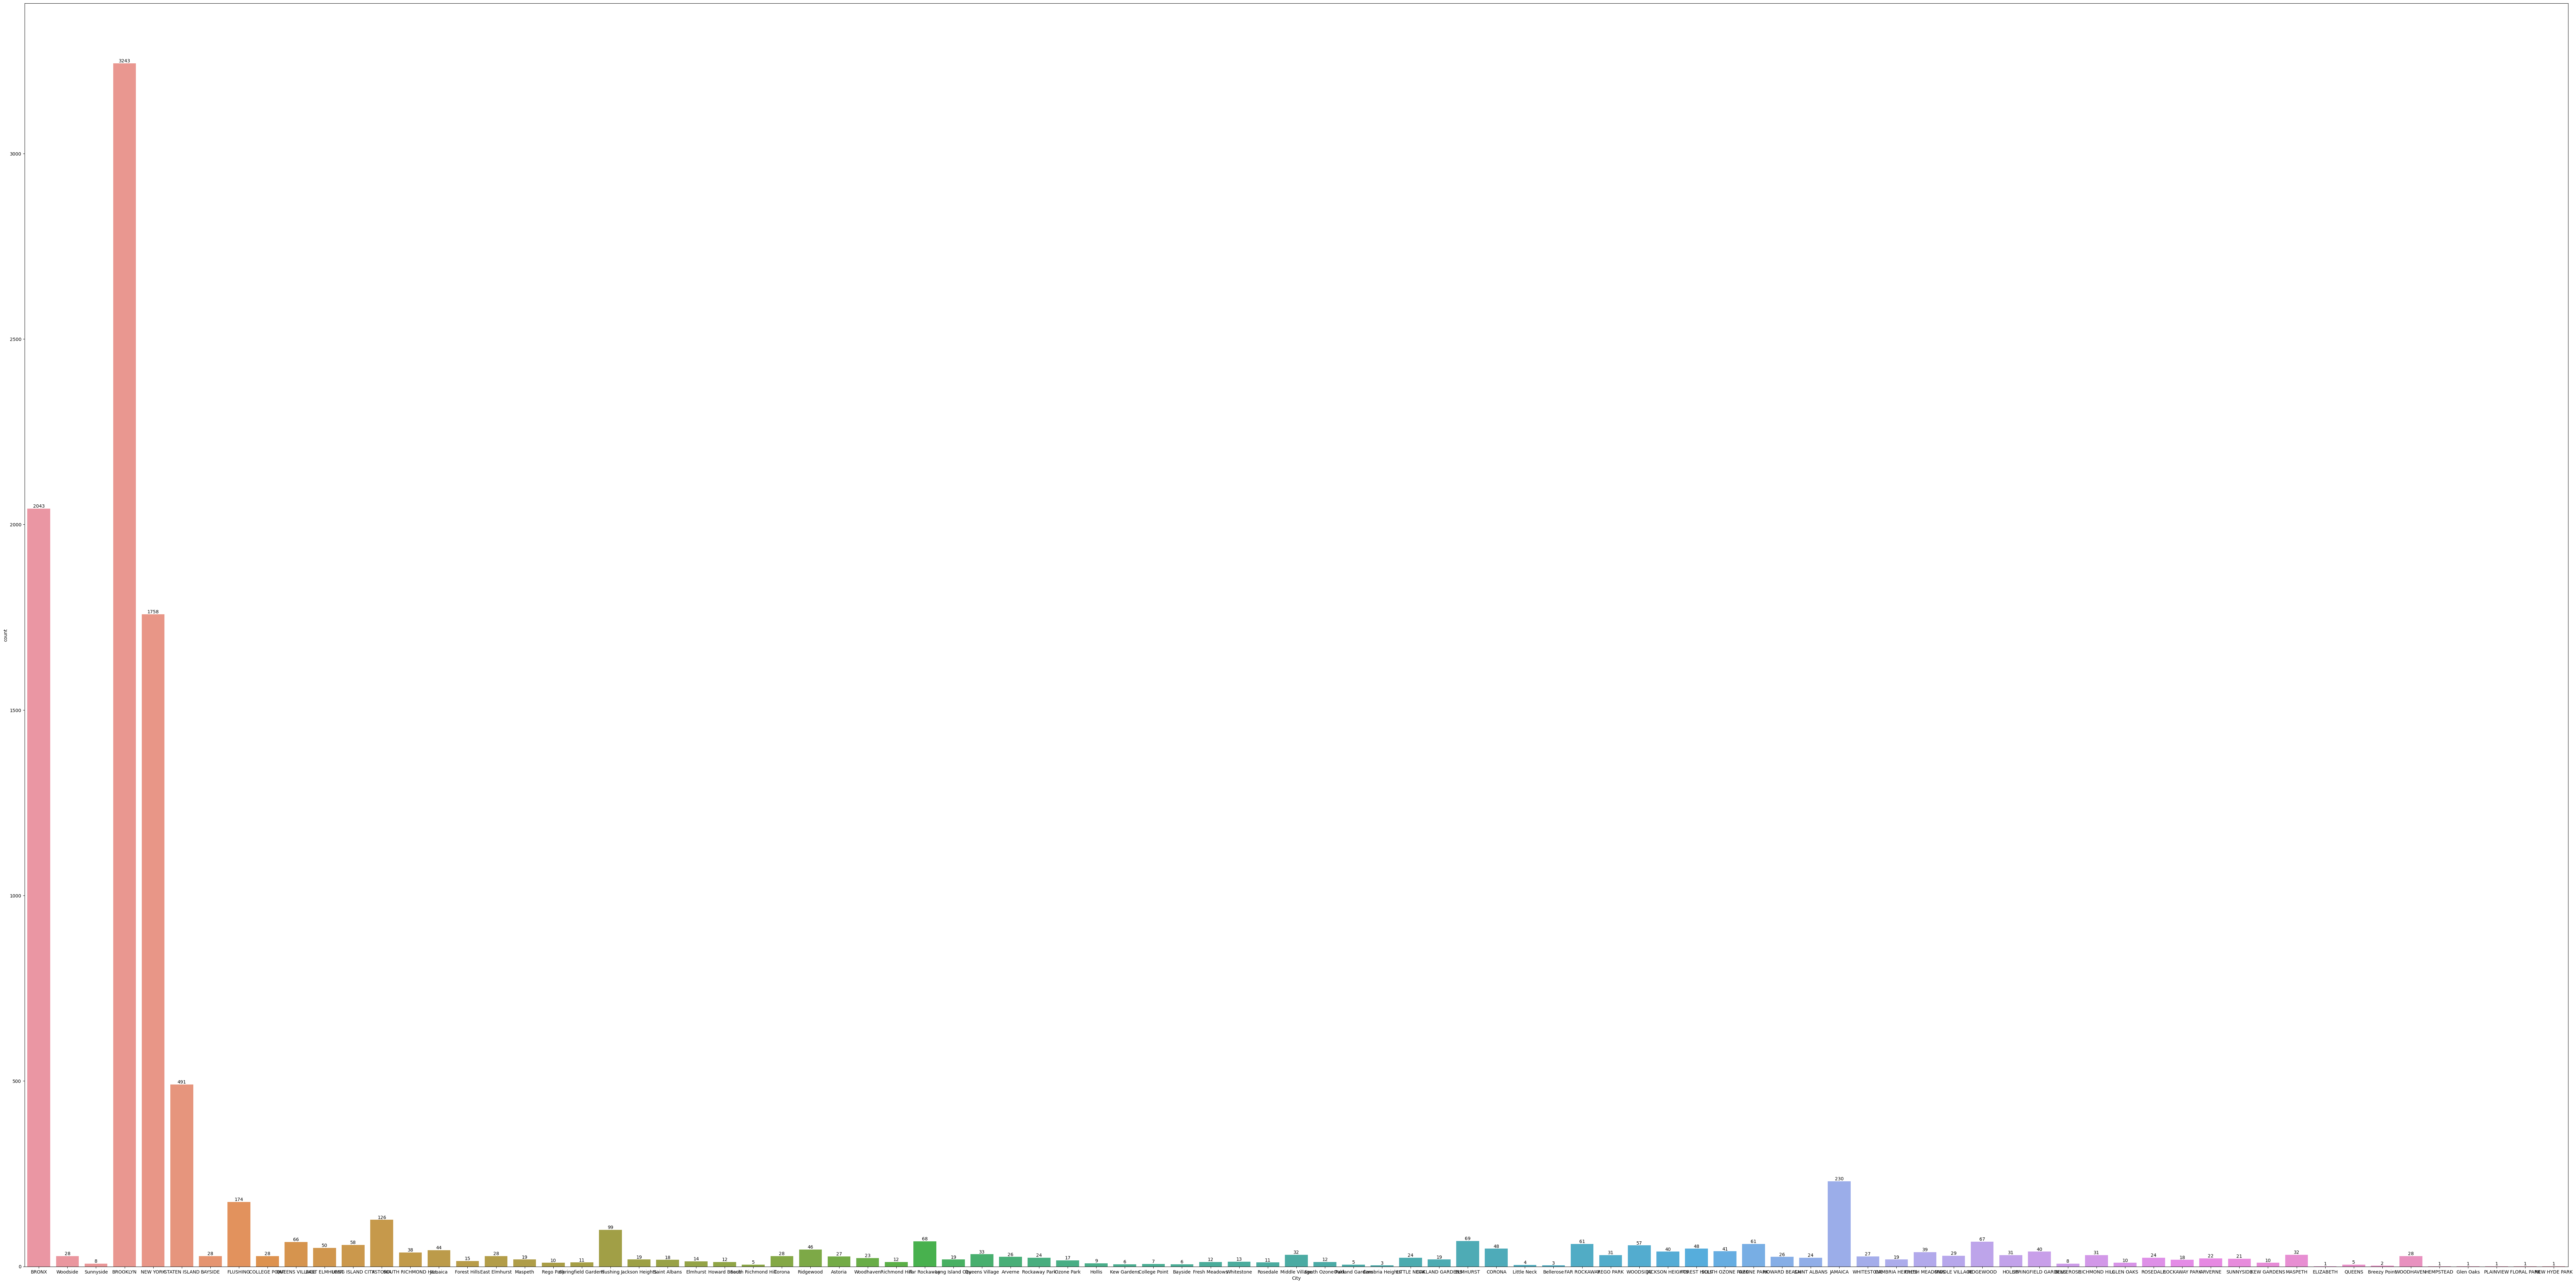

In [19]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(100,50))
ax = sns.countplot(x=dataset['City'])
# x axis will display all the city and y axis will display the count of those cities in dataset column "City"
for label in ax.containers:
    ax.bar_label(label)
# we want to know exact count for each of the bars in plot, label will finally display the count on each of the bars
plt.show()

This plot represents the city wise - total number of complaints

### Insight1
We can see that BROOKLYN, BRONX, NEW YORK, STATEN ISLAND and JAMAIKA has highest count , so maximum number of incidents are reported in these cities

Now let's analyse which category of incidents are reported in each city, we can use jointplot from seaborn to see a comparative visual of the bar chart 

In [20]:
complaint=dataset['Complaint Type'].value_counts().loc[dataset['Complaint Type'].unique()]


In [21]:
complaint

PLUMBING                         600
HEATING                         2089
NONCONST                         376
Noise - Vehicle                   48
Blocked Driveway                 292
                                ... 
Municipal Parking Facility         1
OEM Disabled Vehicle               2
DOE Complaint or Compliment        1
Disorderly Youth                   1
DOF Property - Payment Issue       2
Name: Complaint Type, Length: 140, dtype: int64

In [22]:
complaint.shape

(140,)

<function matplotlib.pyplot.show(close=None, block=None)>

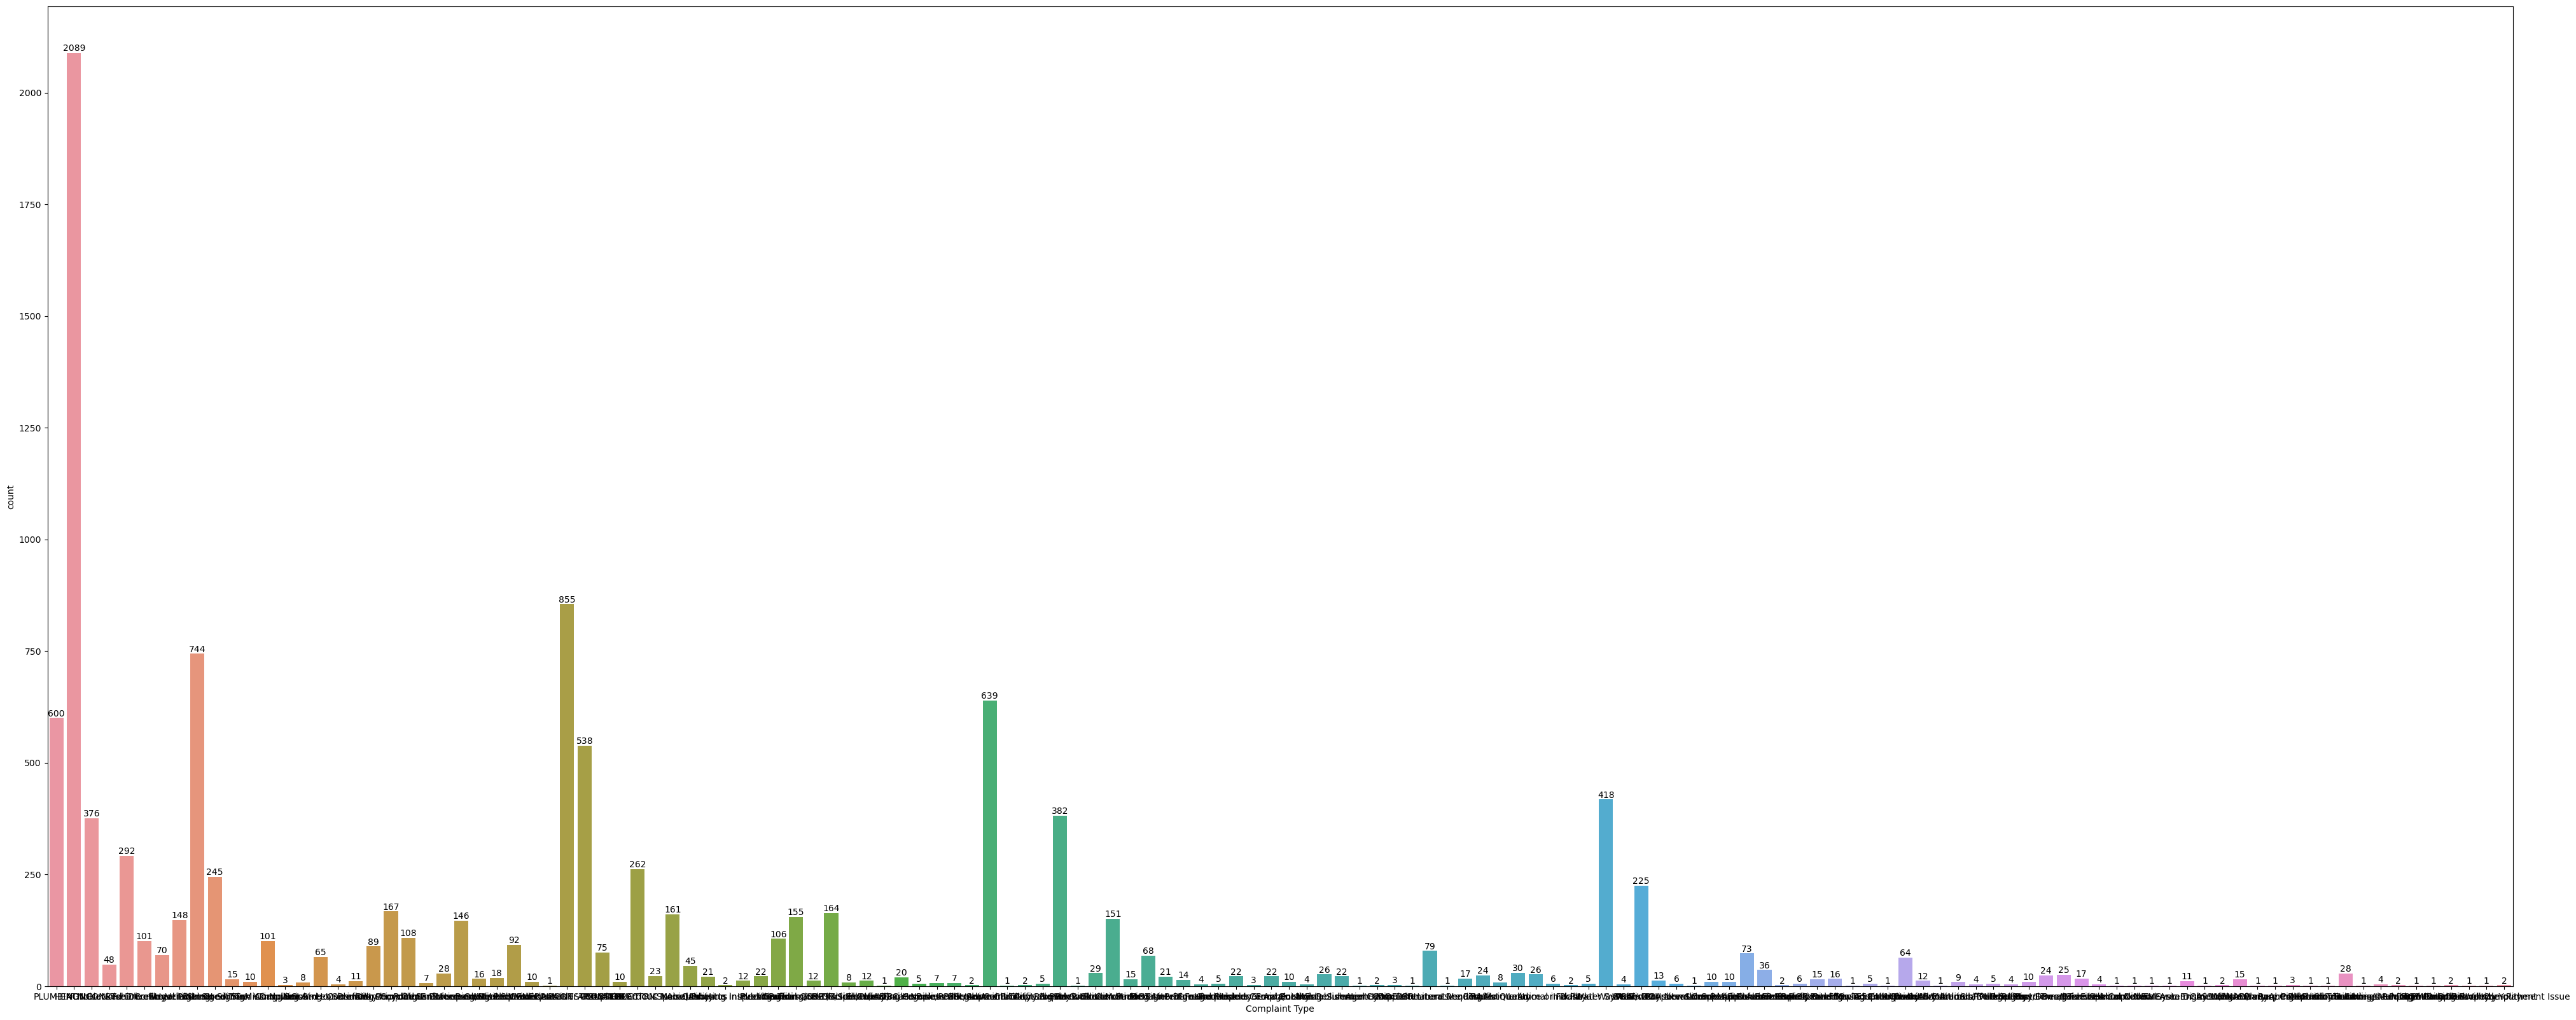

In [23]:
plt.figure(figsize=(50,20))
ax = sns.countplot(x=dataset['Complaint Type'])
for label in ax.containers:
    ax.bar_label(label)
plt.show

<Figure size 5000x2000 with 0 Axes>

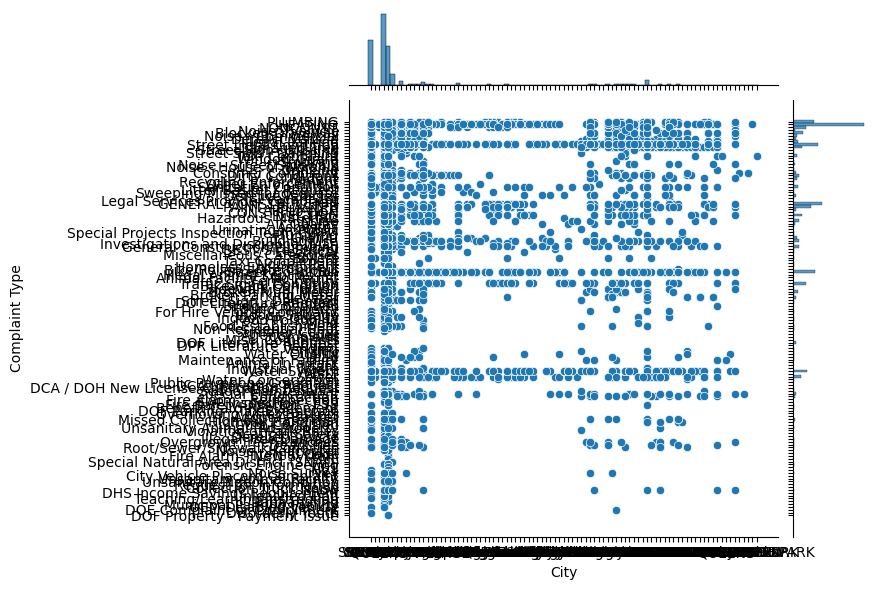

In [24]:
plt.figure(figsize = (50, 20))
ax = sns.jointplot(x=dataset['City'], y= dataset['Complaint Type'])

In [49]:
#since our analysis is concentrated around city and complaint type, lets create a new dataset with only these details
dataframe= dataset[['City', 'Complaint Type']]
dataframe

,City,Complaint Type
0,BRONX,PLUMBING
1,BRONX,PLUMBING
2,BRONX,PLUMBING
3,Woodside,HEATING
4,BRONX,HEATING
...,...,...
10887,NEW YORK,NONCONST
10888,JAMAICA,NONCONST
10889,BROOKLYN,HEATING
10890,BROOKLYN,HEATING


In [50]:
dataframe.columns

Index(['City', 'Complaint Type'], dtype='object')

now let's analyze how the all the category of complaints in each city by using stacked bar plot

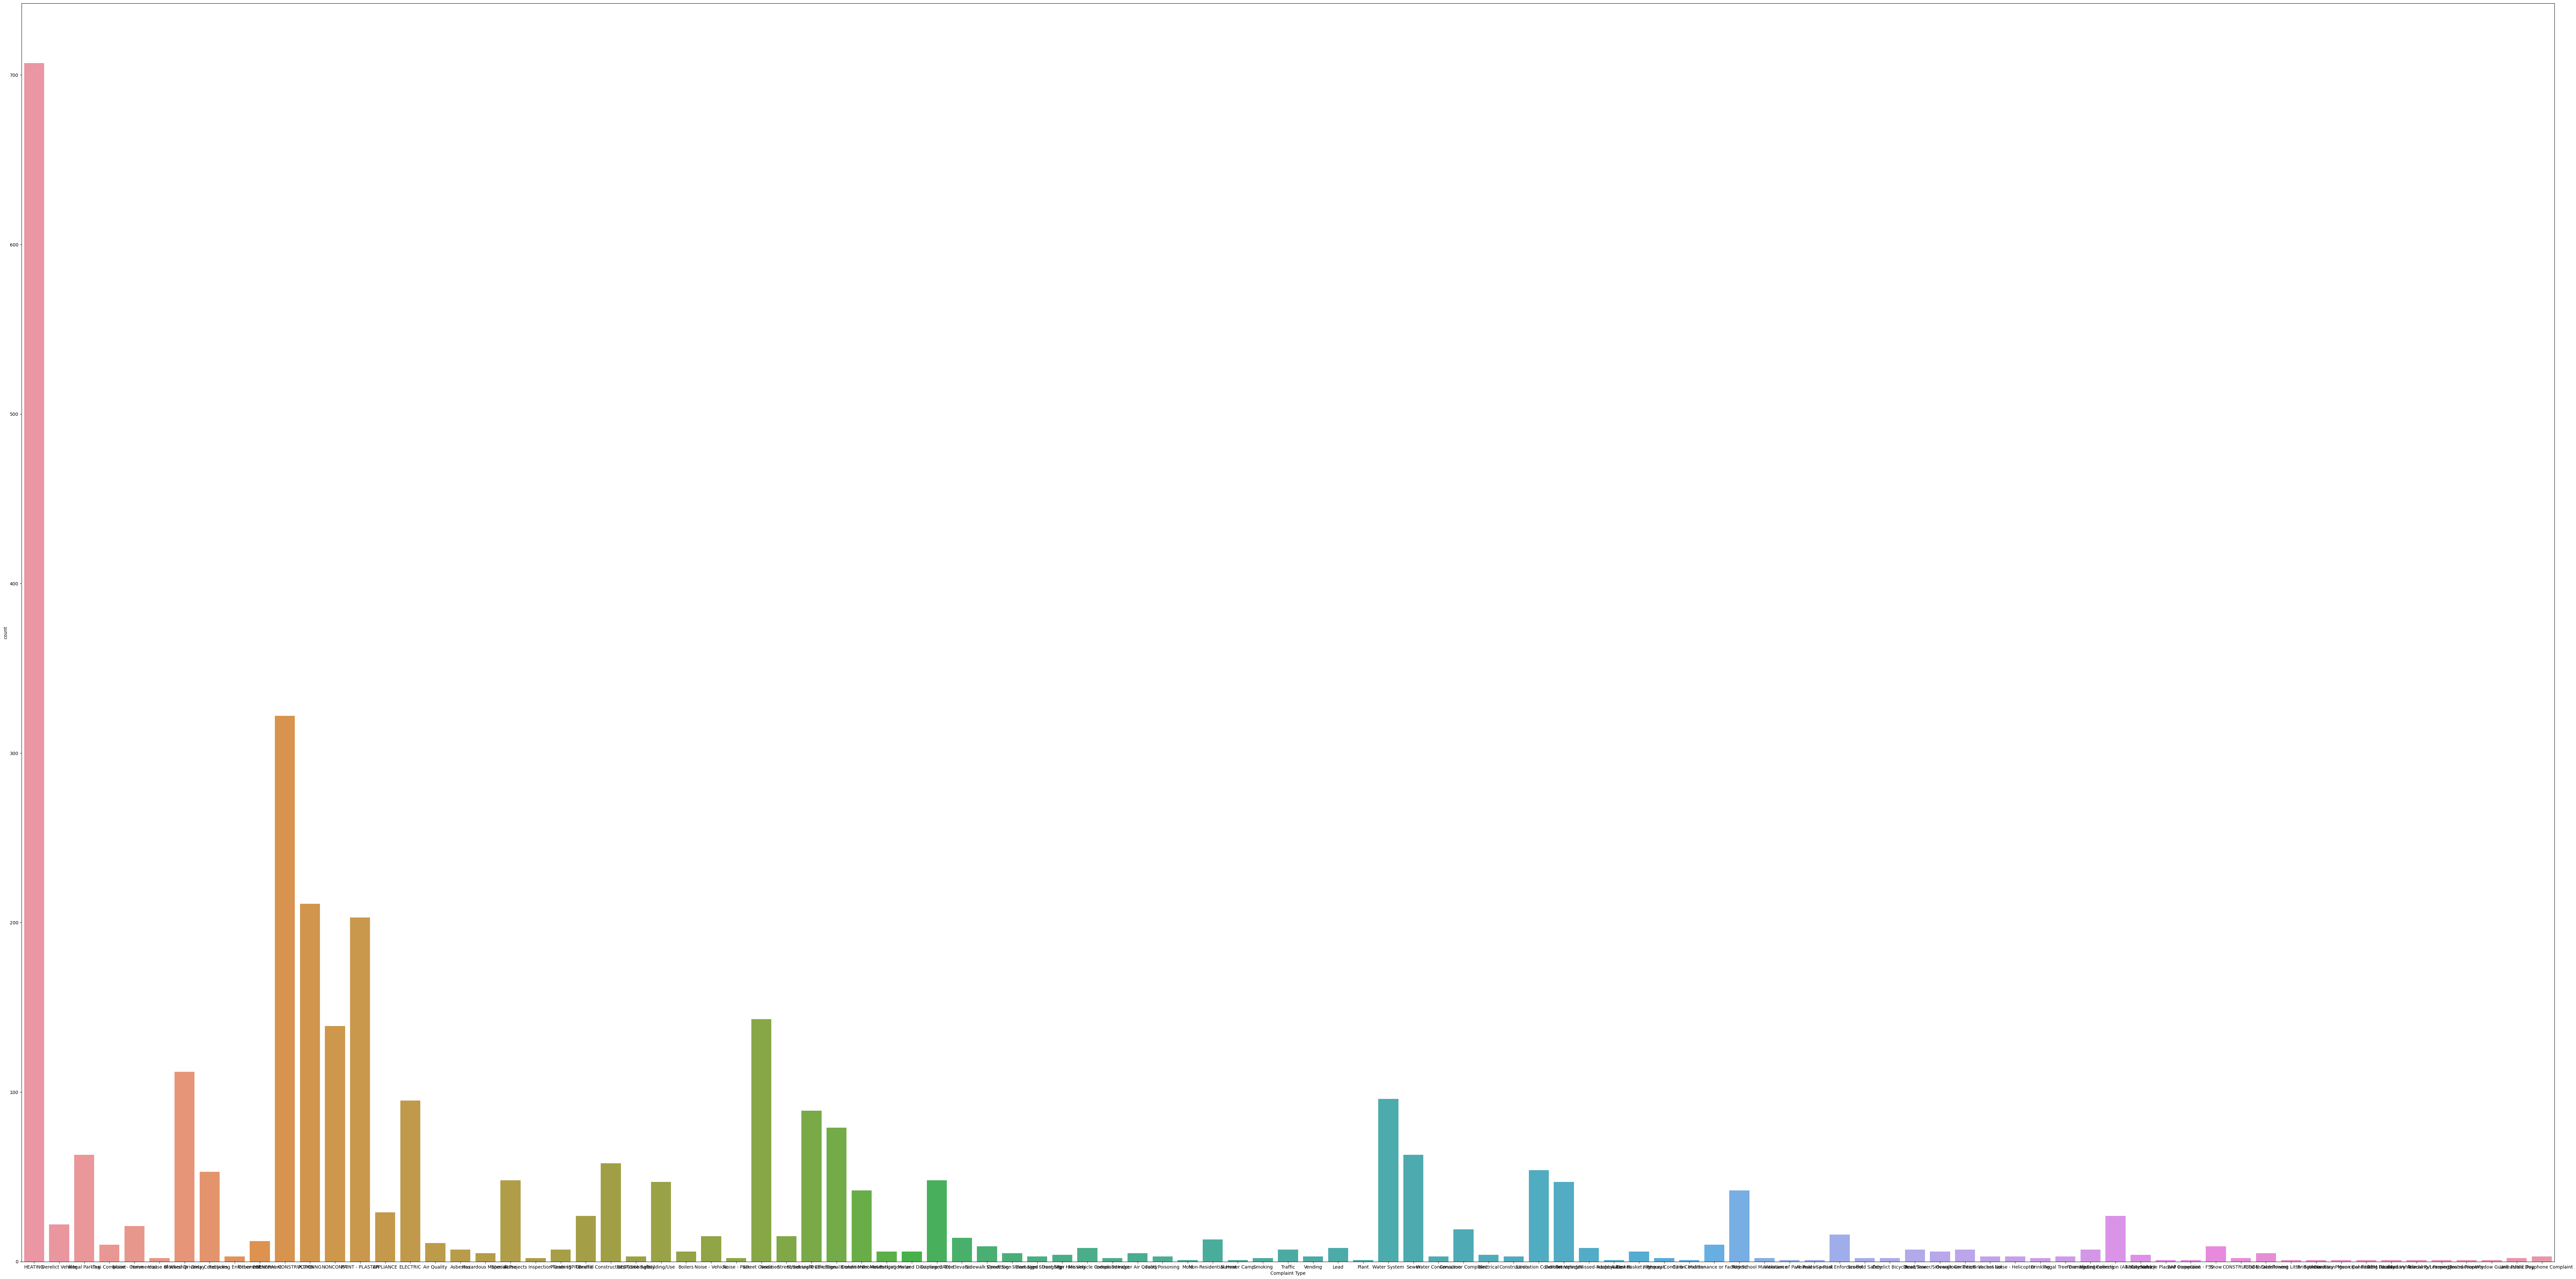

In [64]:
df = dataframe.groupby('City')
brooklyn = df.get_group('BROOKLYN')
plt.figure(figsize=(100,50))
sns.countplot(x=brooklyn['Complaint Type'])
# x axis will display all the city and y axis will display the count of those cities in dataset column "City"

# we want to know exact count for each of the bars in plot, label will finally display the count on each of the bars
plt.show()
#brooklyn

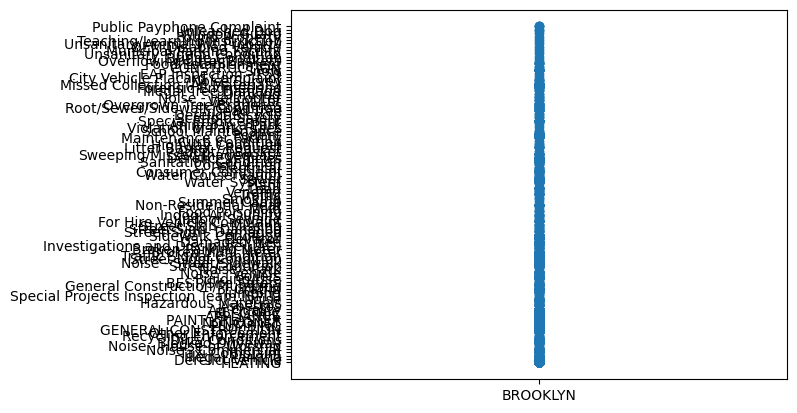

In [69]:
plt.scatter(x=brooklyn['City'], y=brooklyn['Complaint Type'])
plt.show()